In [61]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline

votes_file = '../assets/datasets/votes.csv'
airport_file = '../assets/datasets/Airport_operations.csv'

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [2]:
votes = pd.read_csv(votes_file)

In [3]:
votes.columns

Index([u'Unnamed: 0', u'Class', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6',
       u'V7', u'V8', u'V9', u'V10', u'V11', u'V12', u'V13', u'V14', u'V15',
       u'V16'],
      dtype='object')

In [4]:
votes.shape

(435, 18)

In [5]:
votes.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [6]:
#votes = votes.iloc[:, 1:]
#votes.head(2)

In [7]:
Y = [1 if x == 'democrat' else 0 for x in votes.Class.values]
print Y[0:10]

[0, 0, 1, 1, 1, 1, 1, 0, 0, 1]


In [8]:
Xvote = votes.iloc[:, 1:]
Xvote.head(5)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [9]:
Xvote.isnull().sum()

Class      0
V1        12
V2        48
V3        11
V4        11
V5        15
V6        11
V7        14
V8        15
V9        22
V10        7
V11       21
V12       31
V13       25
V14       17
V15       28
V16      104
dtype: int64

In [10]:
print 'Rows lost:', Xvote.shape[0] - Xvote.dropna().shape[0]
print 'Data points removing rows:', (Xvote.shape[0] - Xvote.dropna().shape[0])*Xvote.shape[1]
print 'Orignal valid data points:', Xvote.shape[0]*Xvote.shape[1] - Xvote.isnull().sum().sum()
print 'INvalid to fill in:', Xvote.isnull().sum().sum()

Rows lost: 203
Data points removing rows: 3451
Orignal valid data points: 7003
INvalid to fill in: 392


In [11]:
def change_yn_to_binary(x):
    if x == 'y':
        return 1
    elif x == 'n':
        return 0
    else:
        return x

# fill in the missing values with random 1 or 0:

# iterate through the columns
for c in Xvote.columns:
    
    Xvote.loc[:, c] = Xvote[c].map(change_yn_to_binary)
    
    # make a mask of rows for this column where the value is null/nan
    mask = Xvote[c].isnull()
    # for those rows at this column, put in random 1s or 0s the size of the number
    # of missing values
    Xvote.loc[mask, c] = np.random.choice(2, size=np.sum(mask))
    
Xvote.isnull().sum()    

Class    0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
dtype: int64

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [12]:
Xvote = Xvote.iloc[:, 1:]
Xn = (Xvote - Xvote.mean()) / Xvote.std()
Xn_corr = Xn.cov()
Xn_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V1,1.000000,0.002024,0.402958,-0.412454,-0.369964,-0.385386,0.344077,0.384682,0.302714,-0.069799,0.108718,-0.388102,-0.332369,-0.337973,0.183795,0.099453
V2,0.002024,1.000000,-0.076721,0.099749,0.154007,0.170346,-0.196488,-0.131942,-0.172434,-0.103425,0.144092,-0.025951,0.223157,-0.015932,-0.104372,-0.042766
V3,0.402958,-0.076721,1.000000,-0.692479,-0.636118,-0.404939,0.569041,0.680217,0.574030,0.022746,0.222930,-0.631314,-0.508357,-0.550765,0.432659,0.259897
V4,-0.412454,0.099749,-0.692479,1.000000,0.750253,0.449944,-0.564814,-0.675970,-0.613473,0.037515,-0.268973,0.637118,0.575499,0.624889,-0.489204,-0.234174
V5,-0.369964,0.154007,-0.636118,0.750253,1.000000,0.603204,-0.667669,-0.817543,-0.770263,0.007083,-0.133370,0.596187,0.628252,0.666598,-0.531147,-0.224187
V6,-0.385386,0.170346,-0.404939,0.449944,0.603204,1.000000,-0.507680,-0.543108,-0.550146,0.079084,0.015464,0.472478,0.510363,0.545563,-0.412743,-0.116754
V7,0.344077,-0.196488,0.569041,-0.564814,-0.667669,-0.507680,1.000000,0.701115,0.632774,0.032827,0.051453,-0.485293,-0.529227,-0.506156,0.467664,0.269869
V8,0.384682,-0.131942,0.680217,-0.675970,-0.817543,-0.543108,0.701115,1.000000,0.727213,0.041888,0.123313,-0.586873,-0.577461,-0.604661,0.517577,0.260958
V9,0.302714,-0.172434,0.574030,-0.613473,-0.770263,-0.550146,0.632774,0.727213,1.000000,0.030001,0.014852,-0.543189,-0.498879,-0.542177,0.445749,0.243980
V10,-0.069799,-0.103425,0.022746,0.037515,0.007083,0.079084,0.032827,0.041888,0.030001,1.000000,-0.022008,0.042066,0.047823,0.092881,-0.074533,0.082215


In [13]:
eigenvalues, eigenvectors = np.linalg.eig(Xn_corr.values)

Now, let's check the eigenvalues: 

In [14]:
eigenvalues

array([ 7.09342689,  1.3646113 ,  1.1385338 ,  0.87817327,  0.86181908,
        0.81030635,  0.14278176,  0.23798864,  0.26703149,  0.31186315,
        0.59585054,  0.36885767,  0.41357897,  0.46110462,  0.51308683,
        0.54098565])

And the eigenvectors: 

In [15]:
print eigenvectors[0:2]
print len(eigenvectors[0])

[[ -1.88827092e-01  -1.77455304e-01  -1.16754187e-01  -5.84985075e-02
    6.44533253e-01   5.12883146e-01   3.35292142e-02   3.33485577e-02
   -1.13188390e-01   7.82457260e-02  -2.20740459e-01   1.57291598e-01
   -1.48252113e-01   1.07205770e-01   3.26742324e-01  -4.95827027e-02]
 [  6.07806362e-02  -6.12866228e-01   5.07606860e-02  -3.67861082e-01
    2.53354696e-01  -5.30104561e-01  -5.70423633e-04   6.34551327e-02
    1.13790818e-01  -1.13720634e-01  -4.98878390e-02   9.35899772e-02
    1.93904778e-01   2.26604386e-01  -4.89051658e-03   8.64569792e-02]]
16


To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

In [16]:
eigen_pairs = [[e_value, e_vector] for e_value, e_vector in zip(eigenvalues, eigenvectors)]
eigen_pairs = sorted(eigen_pairs, reverse=True)

In [17]:
[e[0] for e in eigen_pairs]

[7.0934268923387087,
 1.3646112987914782,
 1.1385337988211506,
 0.87817326686309316,
 0.86181907963511395,
 0.810306347247718,
 0.59585054382613989,
 0.54098564656094572,
 0.51308682767959279,
 0.46110461728179264,
 0.41357896968254326,
 0.36885767189900853,
 0.31186314871249599,
 0.26703148726088782,
 0.23798864187263732,
 0.14278176152665961]

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [18]:
total_variance = np.sum(eigenvalues)
explained_variance = [(e[0]/total_variance)*100 for e in eigen_pairs]
explained_variance

[44.333918077117026,
 8.5288206174467582,
 7.1158362426322066,
 5.4885829178943446,
 5.3863692477194736,
 5.0644146702982482,
 3.7240658989133828,
 3.3811602910059184,
 3.2067926729974618,
 2.8819038580112104,
 2.5848685605159014,
 2.3053604493688087,
 1.949144679453104,
 1.6689467953805528,
 1.4874290117039866,
 0.8923860095416245]

In [19]:
print Xvote.shape

(435, 16)


In [20]:
tmp = pd.DataFrame({'vote':Xvote.iloc[0,:].values,
                    'eigenvector':eigenvectors[0],
                    'PC1_pre_sum':Xvote.iloc[0,:].values*eigenvectors[0]})
tmp

,PC1_pre_sum,eigenvector,vote
0,-0.000000,-0.188827,0.0
1,-0.177455,-0.177455,1.0
2,-0.000000,-0.116754,0.0
3,-0.058499,-0.058499,1.0
4,0.644533,0.644533,1.0
5,0.512883,0.512883,1.0
6,0.000000,0.033529,0.0
7,0.000000,0.033349,0.0
8,-0.000000,-0.113188,0.0
9,0.078246,0.078246,1.0


In [21]:
tmp.PC1_pre_sum.sum()

1.06637086491139

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [29]:
eigenPairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

7.09342689234
1.36461129879
1.13853379882
0.878173266863
0.861819079635
0.810306347248
0.595850543826
0.540985646561
0.51308682768
0.461104617282
0.413578969683
0.368857671899
0.311863148712
0.267031487261
0.237988641873
0.142781761527


Now, calculate the explained variance and the Cumulative explained variance

In [32]:
totalEigen = sum(eigenvalues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenvalues, reverse=True)]
print varExpl

[44.333918077117033, 8.5288206174467582, 7.1158362426322075, 5.4885829178943446, 5.3863692477194745, 5.0644146702982491, 3.7240658989133832, 3.3811602910059184, 3.2067926729974627, 2.8819038580112104, 2.5848685605159014, 2.3053604493688087, 1.9491446794531044, 1.6689467953805528, 1.4874290117039868, 0.89238600954162461]


In [33]:
cvarex = np.cumsum(varExpl)

In [34]:
print(cvarex)

[ 44.33391808  52.86273869  59.97857494  65.46715786  70.8535271
  75.91794177  79.64200767  83.02316796  86.22996064  89.11186449
  91.69673305  94.0020935   95.95123818  97.62018498  99.10761399 100.        ]


Now, conduct a PCA using scikit learn

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [38]:
PCA_set = PCA(n_components=5)
Y = PCA_set.fit_transform(Xvote)

In [39]:
Y

array([[-1.75895252, -0.13111369,  0.36899512,  0.2878014 ,  0.54891794],
       [-1.84912901,  0.30186745, -0.66914018,  0.04615   ,  0.28753463],
       [-1.20826243,  1.11045333, -0.02651253, -0.28106764, -0.20717812],
       ..., 
       [-1.62055221,  0.08074477, -0.07374703, -0.68234447, -0.56222349],
       [-1.36932668, -0.83676473,  0.36728204,  0.00492666,  0.05556549],
       [-1.85992955, -0.05494582,  0.0830168 ,  0.29396959,  0.37146949]])

In [60]:
print PCA_set.n_components
print PCA_set.explained_variance_
x_vals = np.arange(1, PCA_set.n_components)

5
[ 1.73422486  0.33326491  0.26995172  0.21115516  0.20172898]


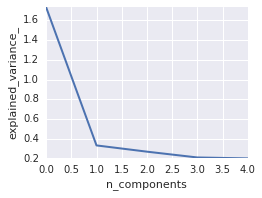

In [62]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(PCA_set.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Case #2: Airport Delays

In [1]:
air = pd.read_csv('../assets/datasets/Airport_operations.csv')

NameError: name 'pd' is not defined

In [8]:
air.head()
air.shape

(841, 15)

First, let's define the x and y variables: Airport is going to be our "x" variable

Then, standardize the x variable for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants